In [21]:
# 예제 데이터 생성
from sklearn.datasets import make_classification
import pandas as pd

X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=100, random_state=10
)

df = pd.DataFrame(X)
df['target'] = y
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,0.327419,-0.123936,0.377707,-0.650123,0.267562,1.228781,2.208772,-0.185977,0.238732,-2.565438,...,0.644056,0.104375,-1.703024,-0.510083,-0.108812,-0.230132,1.553707,1.497538,-1.476485,0
1,-0.843981,-0.018691,-0.841018,1.374583,0.157199,-0.599719,2.217041,-2.032194,-2.310214,-0.490477,...,1.360939,-1.844740,-0.341096,0.137243,1.704764,0.464255,1.225786,-0.842880,1.303258,0
2,-0.204642,0.472155,-0.140616,-2.902493,-1.513665,1.149545,2.283673,-0.809117,-1.723535,-0.958556,...,-0.279701,-1.431391,0.260146,-0.501306,-2.320545,0.422214,1.386474,-0.073335,0.586859,0
3,0.208274,-0.156982,0.063369,-0.545759,-0.395416,-2.679969,1.507772,0.391485,-0.487337,-0.946147,...,-1.011854,-1.124795,0.347291,-1.078836,0.046923,-0.978324,1.100517,-0.697134,0.339577,0
4,0.785568,0.208472,0.760082,-0.046130,0.310844,-0.403927,1.462897,0.962173,-0.520996,1.647360,...,0.316792,-0.261528,-1.260698,0.822700,0.141031,-0.294805,2.216364,-1.129875,-1.059984,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.218414,0.393699,0.653777,-1.312950,-1.025031,0.134849,3.840511,-0.804299,-3.165732,-2.021668,...,-0.581732,-0.151500,-0.150625,0.092327,-0.251294,-0.192647,2.009518,-1.362301,2.664974,0
96,0.212049,-1.717439,0.306482,1.734235,-2.058806,-0.417814,0.376990,-0.834218,-1.355098,1.287204,...,-0.295757,-2.241017,-0.534599,0.533367,0.891498,0.910063,0.349467,1.161048,0.556070,0
97,-0.011497,-0.670154,-0.509845,0.703307,0.857470,0.257115,1.448881,-0.093277,-0.259108,-1.068263,...,-0.359560,-0.688662,2.041108,-2.756415,1.373629,-0.388022,1.090378,-1.388104,-0.304678,0
98,1.107590,1.034863,0.461980,-0.423340,-0.180139,0.624847,1.994488,2.654549,-0.980035,-1.141259,...,0.366621,-1.099235,0.514940,-0.740902,0.321945,0.299279,1.336946,-0.117431,-0.324022,0


In [16]:
# 많은 비율을 차지하는 집단에서 일부만 샘플링
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X, y)
print('Removed Indexes:', rus.sample_indices_)

Removed Indexes: [26 51 19 73 36 62 56 45 79 75  4  8  9 14 16 40 67 70 71 74]


In [17]:
# 소수 집단에서 
from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler(sampling_strategy='minority') : 다수 집단의 데이터 수와 동일하게 맞춤
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

80 new random picked points


In [49]:
# SMOTE (Synthetic Minority Over-sampling Technique) 소수 집단의 데이터를 바탕으로 새로운 데이터를 만들어 냄
# from imblearn.over_sampling import SMOTE
smote_sample = SMOTE(sampling_strategy=0.4) 
X_ros, y_ros = smote_sample.fit_resample(X, y)
# print(X_ros.shape[0] - X.shape[0], 'new random picked points')
X_ros.shape, y_ros.shape

((13860, 5), (13860,))

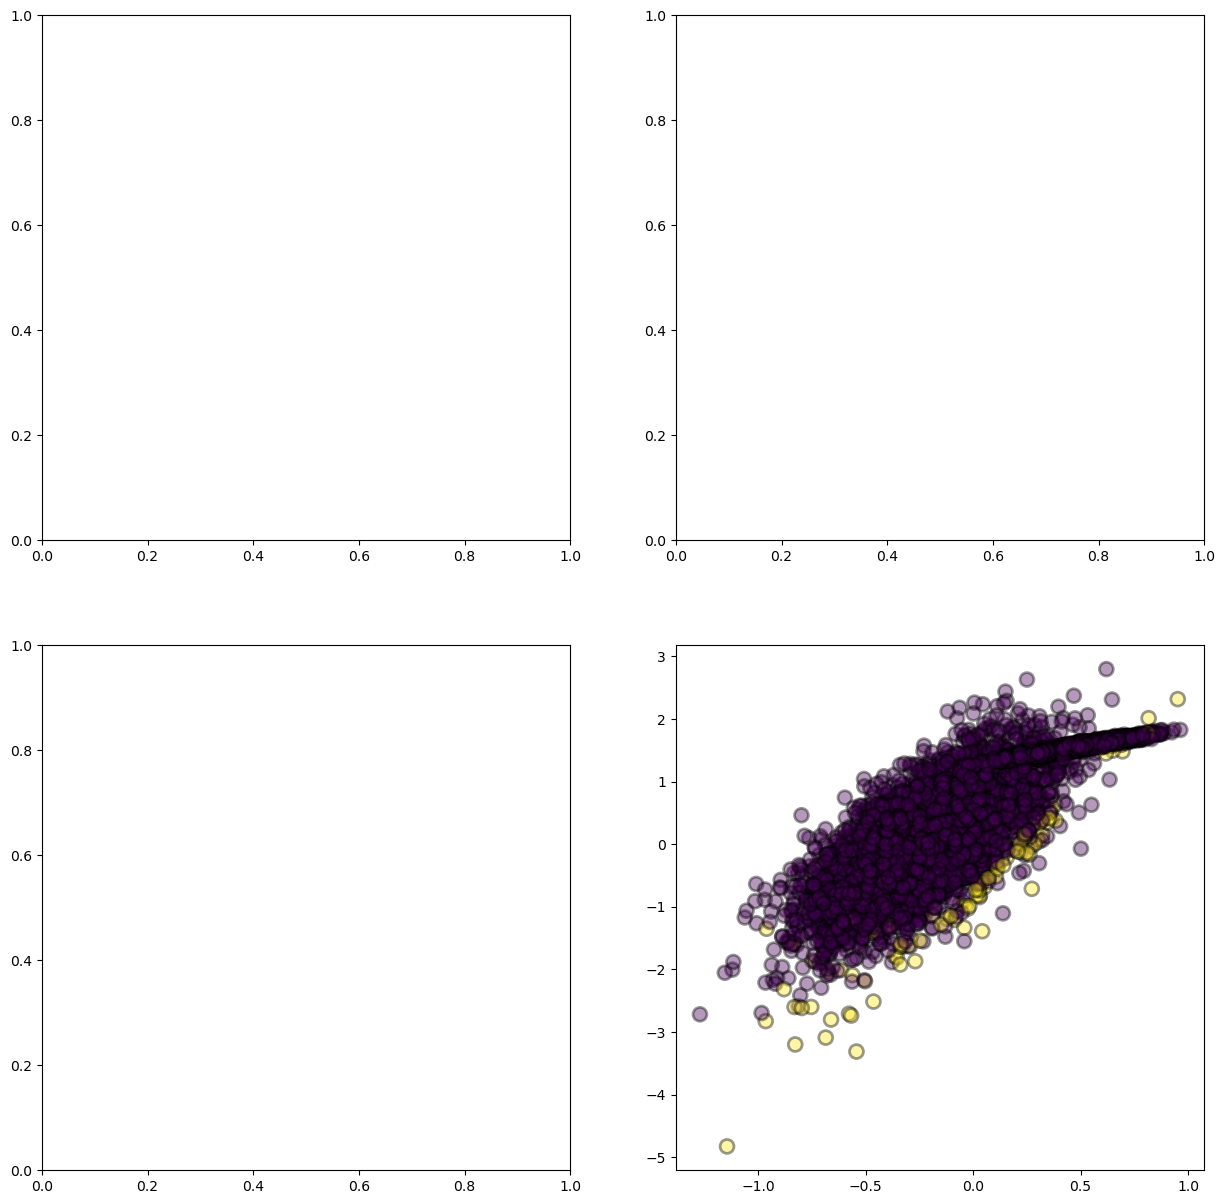

In [45]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
X, y = make_classification(n_samples=10000, n_features=5, weights=[0.99], flip_y=0)
plt.scatter(x=X[:,0], y=X[:,1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=2, alpha=0.4)

In [18]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_resample(X, y)
print('Removed Indexes:', tl.sample_indices_)

Removed Indexes: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]


In [48]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(sampling_strategy={0: 10})
X_cc, y_cc = cc.fit_resample(X, y)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NameError: name 'plot_2d_space' is not defined